In [1]:
#%matplotlib notebook
import json
import requests
#from config import api_key
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import csv
%matplotlib notebook

In [2]:
file = "Exchange_Rate_Report1.csv"
clean_foreign_ex = pd.read_csv(file,header=2)
clean_foreign_ex = clean_foreign_ex[:-34]
clean_foreign_ex

,Date,Australian dollar (AUD),Chinese yuan (CNY),Euro (EUR),Japanese yen (JPY),Swiss franc (CHF),U.K. pound (GBP),U.S. dollar (USD)
0,29-Apr-2013,1.0312,NaN,1.3113,NaN,0.93930,1.55220,1.0
1,30-Apr-2013,1.0368,NaN,1.3072,97.91,0.93630,1.54850,1.0
2,1-May-2013,1.0367,NaN,NaN,97.25,NaN,1.55690,1.0
3,2-May-2013,1.0231,6.2082,1.3191,97.22,0.92880,1.55740,1.0
4,3-May-2013,1.0271,6.2152,1.3114,NaN,0.93220,1.55550,1.0
...,...,...,...,...,...,...,...,...
1944,22-Feb-2021,0.7876,6.4683,1.2133,105.48,0.89815,1.40220,1.0
1945,23-Feb-2021,0.7923,6.4611,1.2143,NaN,0.90030,1.40890,1.0
1946,24-Feb-2021,0.7913,6.4598,1.2146,105.50,0.90730,1.41355,1.0
1947,25-Feb-2021,0.797,6.4509,1.2225,106.05,0.90595,1.41360,1.0


In [3]:
# foreign_ex = foreign_ex.rename(columns={'Representative rates for the period April 28, 2013 - March 23, 2021': 'Date', 'Unnamed: 1': 'Australian Dollar (AUD)', 'Unnamed: 2': 'Chinese Yuan (CNY)', 'Unnamed: 3': 'Euro (EUR)', 'Unnamed: 4': 'Japanese Yen (JPY)', 'Unnamed: 5': 'Swiss Franc (CHF)', 'Unnamed: 6':'U.K. Pound (GBP)', 'Unnamed: 7': 'U.S. Dollar (USD)'})
clean_foreign_ex.columns

Index(['Date', 'Australian dollar   (AUD)                     ',
       'Chinese yuan   (CNY)                     ',
       'Euro   (EUR)                     ',
       'Japanese yen   (JPY)                     ',
       'Swiss franc   (CHF)                     ',
       'U.K. pound   (GBP)                     ',
       'U.S. dollar   (USD)                     '],
      dtype='object')

In [4]:
clean_foreign_ex.columns = ['Date','Australian Dollar (AUD)','Chinese Yuan (CNY)','Euro (EUR)','Japanese Yen (JPY)','Swiss Franc (CHF)','U.K. Pound (GBP)','U.S. Dollar (USD)']
clean_foreign_ex.columns

Index(['Date', 'Australian Dollar (AUD)', 'Chinese Yuan (CNY)', 'Euro (EUR)',
       'Japanese Yen (JPY)', 'Swiss Franc (CHF)', 'U.K. Pound (GBP)',
       'U.S. Dollar (USD)'],
      dtype='object')

In [5]:
#reduce dataframe to currencies we need.  AUD, Pound, EURO, Yuan, Yen, Swiss
forex_clean = clean_foreign_ex[["Date", "Australian Dollar (AUD)", "Euro (EUR)", "U.K. Pound (GBP)", "U.S. Dollar (USD)"]]
forex_clean

,Date,Australian Dollar (AUD),Euro (EUR),U.K. Pound (GBP),U.S. Dollar (USD)
0,29-Apr-2013,1.0312,1.3113,1.55220,1.0
1,30-Apr-2013,1.0368,1.3072,1.54850,1.0
2,1-May-2013,1.0367,NaN,1.55690,1.0
3,2-May-2013,1.0231,1.3191,1.55740,1.0
4,3-May-2013,1.0271,1.3114,1.55550,1.0
...,...,...,...,...,...
1944,22-Feb-2021,0.7876,1.2133,1.40220,1.0
1945,23-Feb-2021,0.7923,1.2143,1.40890,1.0
1946,24-Feb-2021,0.7913,1.2146,1.41355,1.0
1947,25-Feb-2021,0.797,1.2225,1.41360,1.0


In [6]:
forex_clean.dtypes

Date                        object
Australian Dollar (AUD)     object
Euro (EUR)                 float64
U.K. Pound (GBP)           float64
U.S. Dollar (USD)          float64
dtype: object

In [7]:
forex_clean['Australian Dollar (AUD)'] = forex_clean['Australian Dollar (AUD)'].astype(float)

<ipython-input-7-2cedf6eba581>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forex_clean['Australian Dollar (AUD)'] = forex_clean['Australian Dollar (AUD)'].astype(float)


In [8]:
forex_clean.head()

,Date,Australian Dollar (AUD),Euro (EUR),U.K. Pound (GBP),U.S. Dollar (USD)
0,29-Apr-2013,1.0312,1.3113,1.5522,1.0
1,30-Apr-2013,1.0368,1.3072,1.5485,1.0
2,1-May-2013,1.0367,NaN,1.5569,1.0
3,2-May-2013,1.0231,1.3191,1.5574,1.0
4,3-May-2013,1.0271,1.3114,1.5555,1.0


In [9]:
def monthToNum(shortMonth):
    return {
            'jan' : 1,
            'feb' : 2,
            'mar' : 3,
            'apr' : 4,
            'may' : 5,
            'jun' : 6,
            'jul' : 7,
            'aug' : 8,
            'sep' : 9, 
            'oct' : 10,
            'nov' : 11,
            'dec' : 12
    }[shortMonth]
splitdate = pd.DataFrame()
splitdate[['day','month','year']] = forex_clean['Date'].str.split("\s|-", 2, expand=True)
splitdate['month'] = splitdate['month'].str.lower()
splitdate['month'] = splitdate['month'].apply(monthToNum)

# Insert Datestamp YYYMMDD Column for sorting 
forex_clean.insert(1,'Datestamp',pd.to_datetime(splitdate[['year','month','day']]))
forex_clean

,Date,Datestamp,Australian Dollar (AUD),Euro (EUR),U.K. Pound (GBP),U.S. Dollar (USD)
0,29-Apr-2013,2013-04-29,1.0312,1.3113,1.55220,1.0
1,30-Apr-2013,2013-04-30,1.0368,1.3072,1.54850,1.0
2,1-May-2013,2013-05-01,1.0367,NaN,1.55690,1.0
3,2-May-2013,2013-05-02,1.0231,1.3191,1.55740,1.0
4,3-May-2013,2013-05-03,1.0271,1.3114,1.55550,1.0
...,...,...,...,...,...,...
1944,22-Feb-2021,2021-02-22,0.7876,1.2133,1.40220,1.0
1945,23-Feb-2021,2021-02-23,0.7923,1.2143,1.40890,1.0
1946,24-Feb-2021,2021-02-24,0.7913,1.2146,1.41355,1.0
1947,25-Feb-2021,2021-02-25,0.7970,1.2225,1.41360,1.0


In [10]:
# testdf = clean_foreign_ex.sort_values(by='Datestamp')

groupby_mean_df = forex_clean.groupby(pd.Grouper(key='Datestamp',freq='1M')).mean()
groupby_mean_df

forex_groupby_std_df = forex_clean.groupby(pd.Grouper(key='Datestamp',freq='1M')).std()
forex_groupby_std_df

forex_groupby_var_df = forex_clean.groupby(pd.Grouper(key='Datestamp',freq='1M')).var()
forex_groupby_var_df




,Australian Dollar (AUD),Euro (EUR),U.K. Pound (GBP),U.S. Dollar (USD)
Datestamp,,,,
2013-04-30,0.000016,0.000008,0.000007,0.0
2013-05-31,0.000675,0.000113,0.000355,0.0
2013-06-30,0.000260,0.000154,0.000234,0.0
2013-07-31,0.000054,0.000206,0.000254,0.0
2013-08-31,0.000087,0.000029,0.000202,0.0
...,...,...,...,...
2020-10-31,0.000022,0.000023,0.000054,0.0
2020-11-30,0.000111,0.000061,0.000169,0.0
2020-12-31,0.000061,0.000048,0.000154,0.0


In [11]:
cryptodatafile = 'RawCrypto_df.csv'
RawCrypto_df = pd.read_csv(cryptodatafile)

RawCrypto_df['Datestamp'] = pd.to_datetime(RawCrypto_df['Datestamp'], yearfirst= True)

ethereum_df = RawCrypto_df.loc[RawCrypto_df['Coin'] == 'Ethereum'].sort_values(by='Datestamp')
bitcoin_df = RawCrypto_df.loc[RawCrypto_df['Coin'] == 'Bitcoin'].sort_values(by='Datestamp')
litecoin_df = RawCrypto_df.loc[RawCrypto_df['Coin'] == 'Litecoin'].sort_values(by='Datestamp')

bitcoin_std_groupbymonth_df = bitcoin_df.groupby(pd.Grouper(key='Datestamp',freq='1M')).std()
ethereum_std_groupbymonth_df = ethereum_df.groupby(pd.Grouper(key='Datestamp',freq='1M')).std()
litecoin_std_groupbymonth_df = litecoin_df.groupby(pd.Grouper(key='Datestamp',freq='1M')).std()

bitcoin_var_groupbymonth_df = bitcoin_df.groupby(pd.Grouper(key='Datestamp',freq='1M')).var()
ethereum_var_groupbymonth_df = ethereum_df.groupby(pd.Grouper(key='Datestamp',freq='1M')).var()
litecoin_var_groupbymonth_df = litecoin_df.groupby(pd.Grouper(key='Datestamp',freq='1M')).var()

bitcoin_mean_groupbymonth_df = bitcoin_df.groupby(pd.Grouper(key='Datestamp',freq='1M')).mean()
ethereum_mean_groupbymonth_df = ethereum_df.groupby(pd.Grouper(key='Datestamp',freq='1M')).mean()
litecoin_mean_groupbymonth_df = litecoin_df.groupby(pd.Grouper(key='Datestamp',freq='1M')).mean()


bitcoin_mean_groupbymonth_df




,Unnamed: 0,Open,High,Low,Close,Volume
Datestamp,,,,,,
2013-04-30,2861.5,139.220000,147.210000,134.025000,141.770000,0.000000e+00
2013-05-31,2845.0,120.292258,123.948710,114.253226,119.992581,0.000000e+00
2013-06-30,2814.5,108.856667,111.300667,104.602000,107.761333,0.000000e+00
2013-07-31,2784.0,90.311290,93.869032,86.719677,90.512258,0.000000e+00
2013-08-31,2753.0,113.041935,116.002258,111.387742,113.905161,0.000000e+00
...,...,...,...,...,...,...
2020-10-31,135.0,11791.306774,12018.847742,11648.077097,11886.978387,3.389918e+10
2020-11-30,104.5,16450.120667,16945.980667,16064.074333,16645.757333,3.643816e+10
2020-12-31,74.0,21680.541290,22354.685806,21229.361613,21983.136774,3.910515e+10


In [12]:
combined_std_df = pd.DataFrame()

combined_std_df['Australian Dollar (AUD)'] = forex_groupby_std_df['Australian Dollar (AUD)']
combined_std_df['Euro (EUR)'] = forex_groupby_std_df['Euro (EUR)']
combined_std_df['U.K. Pound (GBP)'] = forex_groupby_std_df['U.K. Pound (GBP)']

combined_std_df['Bitcoin'] = bitcoin_std_groupbymonth_df['Close']
combined_std_df['Ethereum'] = ethereum_std_groupbymonth_df['Close']
combined_std_df['Litecoin'] = litecoin_std_groupbymonth_df['Close']

In [13]:
combined_var_df = pd.DataFrame()

combined_var_df['Bitcoin'] = bitcoin_var_groupbymonth_df['Close']
combined_var_df['Ethereum'] = ethereum_var_groupbymonth_df['Close']
combined_var_df['Litecoin'] = litecoin_var_groupbymonth_df['Close']

combined_var_df['Australian Dollar (AUD)'] = forex_groupby_var_df['Australian Dollar (AUD)']
combined_var_df['Euro (EUR)'] = forex_groupby_var_df['Euro (EUR)']
combined_var_df['U.K. Pound (GBP)'] = forex_groupby_var_df['U.K. Pound (GBP)']


combined_var_df

,Bitcoin,Ethereum,Litecoin,Australian Dollar (AUD),Euro (EUR),U.K. Pound (GBP)
Datestamp,,,,,,
2013-04-30,1.534580e+01,NaN,0.003200,0.000016,0.000008,0.000007
2013-05-31,7.572953e+01,NaN,0.044545,0.000675,0.000113,0.000355
2013-06-30,7.754557e+01,NaN,0.088699,0.000260,0.000154,0.000234
2013-07-31,9.889976e+01,NaN,0.027473,0.000054,0.000206,0.000254
2013-08-31,8.719802e+01,NaN,0.014559,0.000087,0.000029,0.000202
...,...,...,...,...,...,...
2020-10-31,1.191418e+06,449.551269,18.869548,0.000022,0.000023,0.000054
2020-11-30,2.926164e+06,4407.859322,136.485697,0.000111,0.000061,0.000169
2020-12-31,1.193249e+07,3081.075054,412.099917,0.000061,0.000048,0.000154


In [14]:
combined_mean_df = pd.DataFrame()

combined_mean_df['Bitcoin'] = bitcoin_var_groupbymonth_df['Close']
combined_mean_df['Ethereum'] = ethereum_var_groupbymonth_df['Close']
combined_mean_df['Litecoin'] = litecoin_var_groupbymonth_df['Close']

combined_var_df['Australian Dollar (AUD)'] = forex_groupby_var_df['Australian Dollar (AUD)']
combined_var_df['Euro (EUR)'] = forex_groupby_var_df['Euro (EUR)']
combined_var_df['U.K. Pound (GBP)'] = forex_groupby_var_df['U.K. Pound (GBP)']


In [15]:
combined_std_df.head()

,Australian Dollar (AUD),Euro (EUR),U.K. Pound (GBP),Bitcoin,Ethereum,Litecoin
Datestamp,,,,,,
2013-04-30,0.003960,0.002899,0.002616,3.917372,NaN,0.056569
2013-05-31,0.025976,0.010623,0.018847,8.702272,NaN,0.211057
2013-06-30,0.016126,0.012397,0.015292,8.805996,NaN,0.297824
2013-07-31,0.007344,0.014367,0.015931,9.944836,NaN,0.165750
2013-08-31,0.009310,0.005427,0.014230,9.337988,NaN,0.120661


In [16]:
#Mean for AUD, CNY, EUR, JPY, CHF, GBP

AUD_mean = forex_clean['Australian Dollar (AUD)'].mean()
EURO_mean = forex_clean['Euro (EUR)'].mean()
GBP_mean = forex_clean['U.K. Pound (GBP)'].mean()
USD_mean = forex_clean['U.S. Dollar (USD)'].mean()
print(f"The mean for AUD is {AUD_mean}")
print(f"The mean for EURO is {EURO_mean}")
print(f"The mean for GBP is {GBP_mean}")
print(f"The mean for USD is {USD_mean}")

The mean for AUD is 0.7730917910447763
The mean for EURO is 1.1756792099792075
The mean for GBP is 1.4040946957878329
The mean for USD is 1.0


In [17]:
for_ex_clean = forex_clean.fillna(method='ffill')
for_ex_clean

,Date,Datestamp,Australian Dollar (AUD),Euro (EUR),U.K. Pound (GBP),U.S. Dollar (USD)
0,29-Apr-2013,2013-04-29,1.0312,1.3113,1.55220,1.0
1,30-Apr-2013,2013-04-30,1.0368,1.3072,1.54850,1.0
2,1-May-2013,2013-05-01,1.0367,1.3072,1.55690,1.0
3,2-May-2013,2013-05-02,1.0231,1.3191,1.55740,1.0
4,3-May-2013,2013-05-03,1.0271,1.3114,1.55550,1.0
...,...,...,...,...,...,...
1944,22-Feb-2021,2021-02-22,0.7876,1.2133,1.40220,1.0
1945,23-Feb-2021,2021-02-23,0.7923,1.2143,1.40890,1.0
1946,24-Feb-2021,2021-02-24,0.7913,1.2146,1.41355,1.0
1947,25-Feb-2021,2021-02-25,0.7970,1.2225,1.41360,1.0


In [18]:
# Push the remade DataFrame to a new CSV file
for_ex_clean.to_csv("for_ex_clean.csv",
                  encoding="utf-8", index=False, header=True)

In [19]:
#Summary 

#MAX and MIN
aud_max = for_ex_clean['Australian Dollar (AUD)'].max()
aud_min = for_ex_clean['Australian Dollar (AUD)'].min()

euro_max = for_ex_clean['Euro (EUR)'].max()
euro_min = for_ex_clean['Euro (EUR)'].min()

gbp_max = for_ex_clean['U.K. Pound (GBP)'].max()
gbp_min = for_ex_clean['U.K. Pound (GBP)'].min()

print(f"The max value of USD vs AUD is {aud_max} and the min value of USD vs AUD is {aud_min}.")
print(f"The max value of USD vs EURO is {euro_max} and the min value of USD vs EURO is {euro_min}.")
print(f"The max value of USD vs GBP is {gbp_max} and the min value of USD vs GBP is {gbp_min}.")
print(f"---------------------------------------------------------------------------------------------------")


#Standard Deviation
aud_std = for_ex_clean['Australian Dollar (AUD)'].std()
euro_std = for_ex_clean['Euro (EUR)'].std()
gbp_std = for_ex_clean['U.K. Pound (GBP)'].std()

print(f"The Standard Deviation for the AUD is {aud_std}.")
print(f"The Standard Deviation for the Euro is {euro_std}.")
print(f"The Standard Deviation for the GBP is {gbp_std}.")
print(f"---------------------------------------------------------------------------------------------------")

#Mean
aud_mean = for_ex_clean['Australian Dollar (AUD)'].mean()
euro_mean = for_ex_clean['Euro (EUR)'].mean()
gbp_mean = for_ex_clean['U.K. Pound (GBP)'].mean()

print(f"The Mean for the AUD is {aud_mean}.")
print(f"The Mean for the Euro is {euro_mean}.")
print(f"The Mean for the GBP is {gbp_mean}.")
print(f"---------------------------------------------------------------------------------------------------")

#Mode
aud_mode = for_ex_clean['Australian Dollar (AUD)'].mode()
euro_mode = for_ex_clean['Euro (EUR)'].mode()
gbp_mode = for_ex_clean['U.K. Pound (GBP)'].mode()

print(f"The Mode for the AUD is {aud_mode}.")
print(f"The Mode for the Euro is {euro_mode}.")
print(f"The Mode for the GBP is {gbp_mode}.")
print(f"---------------------------------------------------------------------------------------------------")


#Variance 
aud_var = for_ex_clean['Australian Dollar (AUD)'].var()
euro_var = for_ex_clean['Euro (EUR)'].var()
gbp_var = for_ex_clean['U.K. Pound (GBP)'].var()

print(f"The Variance for the AUD is {aud_var}.")
print(f"The Variance for the Euro is {euro_var}.")
print(f"The Variance for the GBP is {gbp_var}.")
print(f"---------------------------------------------------------------------------------------------------")


The max value of USD vs AUD is 1.0368 and the min value of USD vs AUD is 0.5571.
The max value of USD vs EURO is 1.3953 and the min value of USD vs EURO is 1.0364.
The max value of USD vs GBP is 1.7161 and the min value of USD vs GBP is 1.1531.
---------------------------------------------------------------------------------------------------
The Standard Deviation for the AUD is 0.0848522762252411.
The Standard Deviation for the Euro is 0.09272083195486291.
The Standard Deviation for the GBP is 0.144559546383502.
---------------------------------------------------------------------------------------------------
The Mean for the AUD is 0.7730066187788619.
The Mean for the Euro is 1.1756381221139014.
The Mean for the GBP is 1.4040067470497704.
---------------------------------------------------------------------------------------------------
The Mode for the AUD is 0    0.7000
1    0.7093
2    0.7522
3    0.7615
dtype: float64.
The Mode for the Euro is 0    1.1215
dtype: float64.
The Mo

<IPython.core.display.Javascript object>


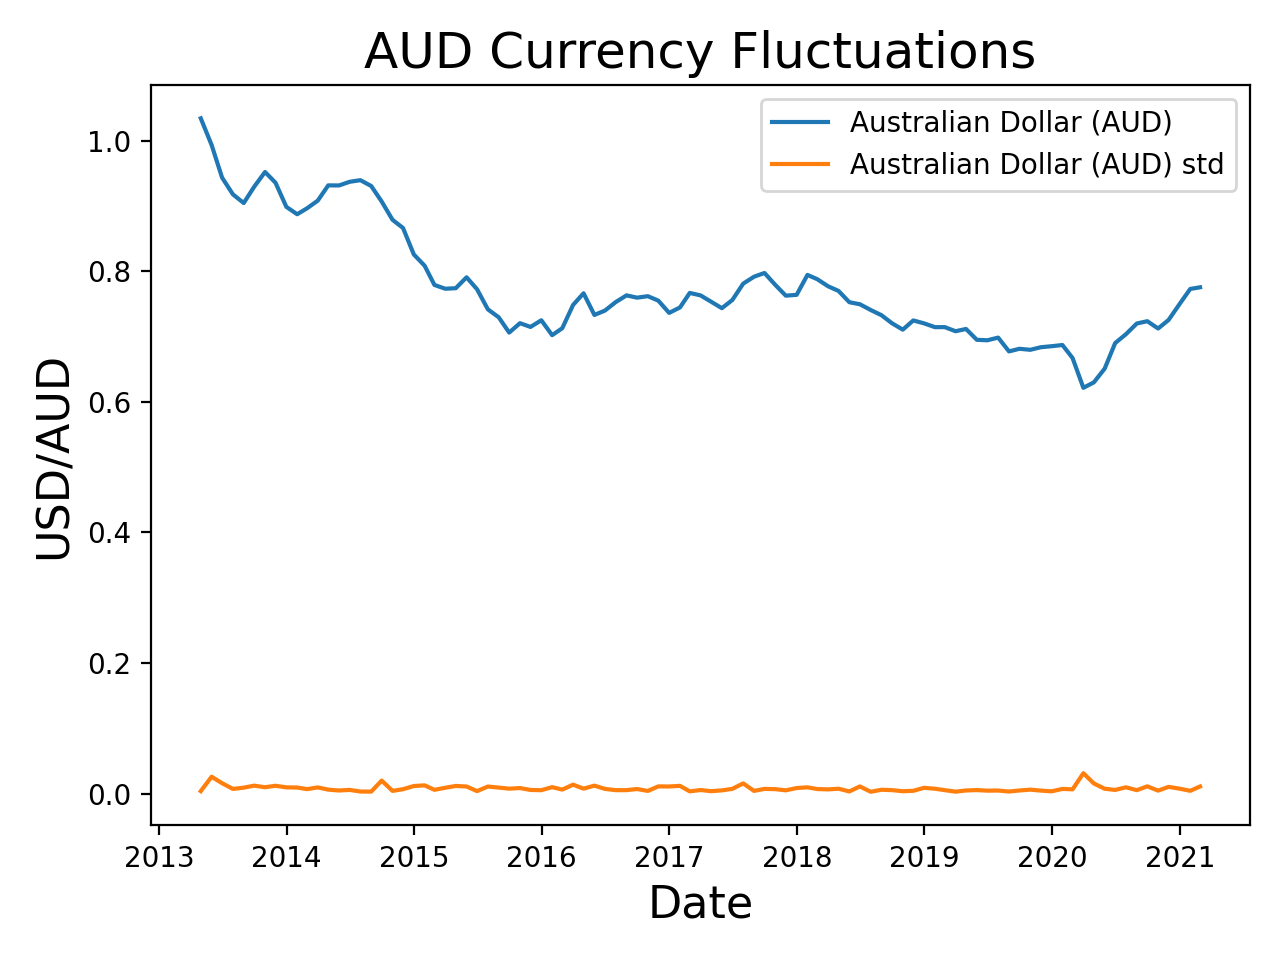

In [22]:
#AUD Currency Fluctuations
plt.plot(groupby_mean_df['Australian Dollar (AUD)'])
plt.plot(forex_groupby_std_df['Australian Dollar (AUD)']) 
plt.xlabel("Date",size=16)
plt.ylabel("USD/AUD",size=16)
plt.title("AUD Currency Fluctuations", size=18)
plt.gca().legend(('Australian Dollar (AUD)','Australian Dollar (AUD) std'))
plt.tight_layout()
plt.savefig("AUD Currency Fluctuations.png")

In [23]:
#Euro Currency Fluctuations
plt.plot(groupby_mean_df['Euro (EUR)'])
plt.plot(forex_groupby_std_df['Euro (EUR)']) 
plt.xlabel("Date",size=16)
plt.ylabel("USD/EURO",size=16)
plt.title("Euro Currency Fluctuations", size=18)
plt.gca().legend(('Euro (EUR)','Euro (EUR) std'))
plt.tight_layout()
plt.savefig("Euro Currency Fluctuations.png")

<IPython.core.display.Javascript object>

In [24]:
#GBP Currency Fluctuations
plt.plot(groupby_mean_df['U.K. Pound (GBP)'])
plt.plot(forex_groupby_std_df['U.K. Pound (GBP)']) 
plt.xlabel("Date",size=16)
plt.ylabel("USD/GBP",size=16)
plt.title("GBP Currency Fluctuations", size=18)
plt.gca().legend(('U.K. Pound (GBP)','U.K. Pound (GBP) std'))
plt.tight_layout()
plt.savefig("GBP Currency Fluctuations.png")

<IPython.core.display.Javascript object>

In [25]:
#Bitcoin Fluctuations 
plt.plot(combined_mean_df['Bitcoin'])
plt.plot(combined_std_df['Bitcoin']) 
plt.xlabel("Date",size=16)
plt.ylabel("USD/Bitcoin",size=16)
plt.title("Bitcoin Currency Fluctuations", size=18)
plt.gca().legend(('Bitcoin','Bitcoin std'))
plt.tight_layout()
plt.savefig("Bitcoin Currency Fluctuations.png")

<IPython.core.display.Javascript object>

In [26]:
#Ethereum Fluctuations
plt.plot(combined_mean_df['Ethereum'])
plt.plot(combined_std_df['Ethereum']) 
plt.xlabel("Date",size=16)
plt.ylabel("USD/Ethereum",size=16)
plt.title("Ethereum Currency Fluctuations", size=18)
plt.gca().legend(('Ethereum','Ethereum std'))
plt.tight_layout()
plt.savefig("Ethereum Currency Fluctuations.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


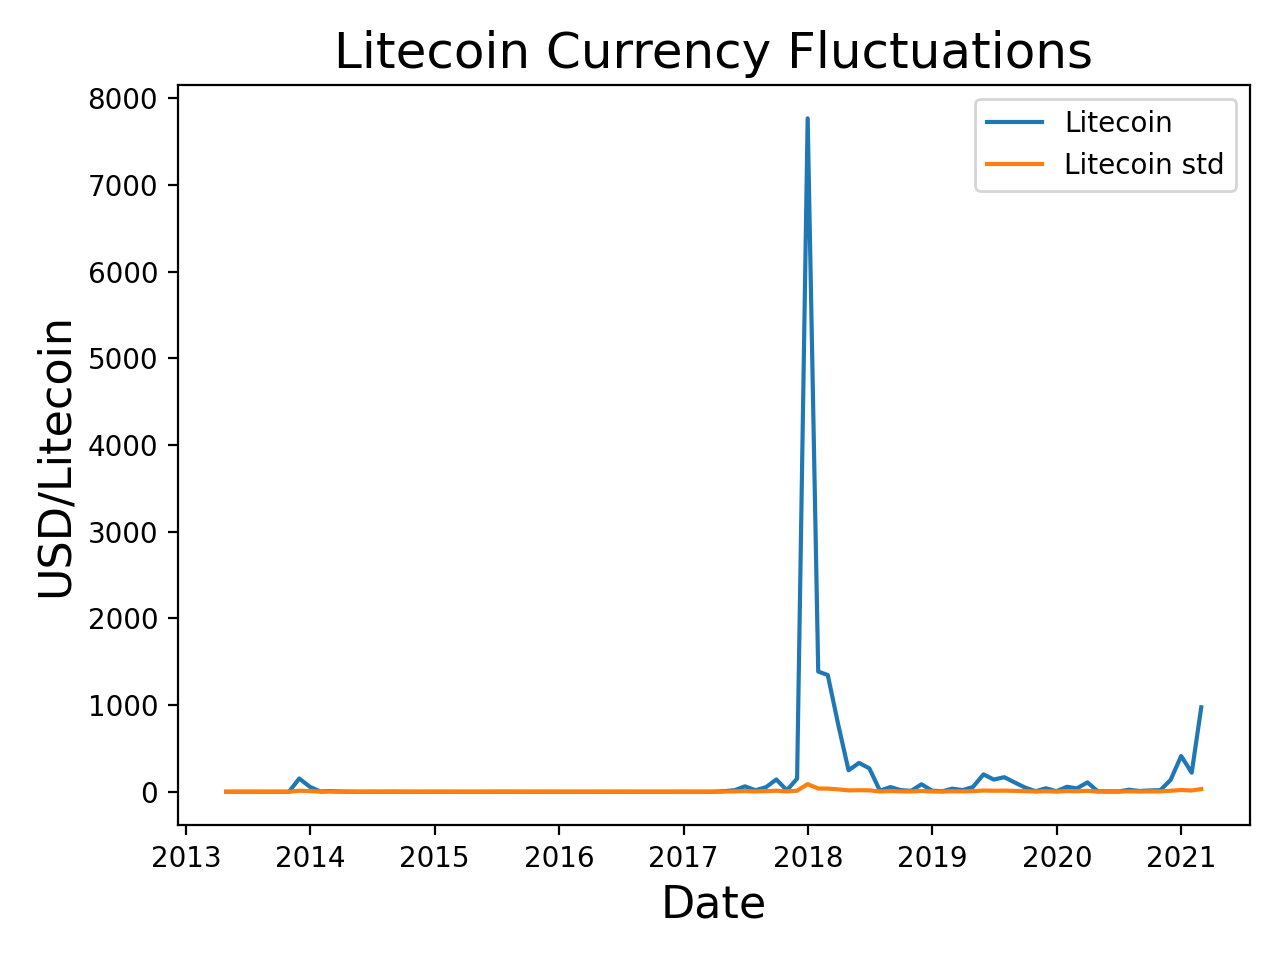

In [27]:
#Litecoin Fluctuations
plt.plot(combined_mean_df['Litecoin'])
plt.plot(combined_std_df['Litecoin']) 
plt.xlabel("Date",size=16)
plt.ylabel("USD/Litecoin",size=16)
plt.title("Litecoin Currency Fluctuations", size=18)
plt.gca().legend(('Litecoin','Litecoin std'))
plt.tight_layout()
plt.savefig("Litecoin Currency Fluctuations.png")

In [28]:
#Combined Crypto and Traditional Currencies Fluctuation in STD
plt.plot(combined_std_df)
plt.legend(loc = 'upper left')
plt.ylim(-10, 100)
plt.xlabel("Date",size=16)
plt.ylabel("USD/Currency",size=16)
plt.title("Traditional and Crypto Fluctuations(Std)", size=18)
plt.tight_layout()
plt.savefig("Traditional Vs Crypto-Currencies Fluctuations.png")

<IPython.core.display.Javascript object>

No handles with labels found to put in legend.


In [29]:
plt.plot(combined_std_df['Bitcoin'])
plt.plot(combined_std_df['Ethereum'])
plt.plot(combined_std_df['Litecoin'])
plt.legend(loc = 'upper left')
plt.ylim(0, 100)
plt.xlabel("Date",size=16)
plt.ylabel("USD/Currency",size=16)
plt.title("Cryptocurrency Fluctuations (Std)", size=18)
plt.gca().legend(('Bitcoin','Ethereum', 'Litecoin'))
plt.tight_layout()
plt.savefig("Crypto-Currencies Fluctuations.png")

<IPython.core.display.Javascript object>

No handles with labels found to put in legend.


In [30]:
#Traditional Cryptocurrency Fluctuations in STD
plt.plot(forex_groupby_std_df['U.K. Pound (GBP)']) 
plt.plot(forex_groupby_std_df['Euro (EUR)']) 
plt.plot(forex_groupby_std_df['Australian Dollar (AUD)'])
plt.ylim(0, 0.2)
plt.xlabel("Date",size=16)
plt.ylabel("USD/Currency",size=16)
plt.title("Traditional Currencies Fluctuations (Std)", size=18)
plt.gca().legend(('U.K. Pound (GBP)std','Euro (EUR)std', 'Australian Dollar (AUD)std'))
plt.tight_layout()
plt.savefig("Traditional Currency Fluctuations.png")

<IPython.core.display.Javascript object>